# Part 1

## Tutorial Part 1: Regression classification model end-to-end example/tutorial

### Getting data

In [1]:
# Import libraries
from sklearn.datasets import make_blobs
import tensorflow as tf
import matplotlib.pyplot as plt

(1000, 2) (1000,)


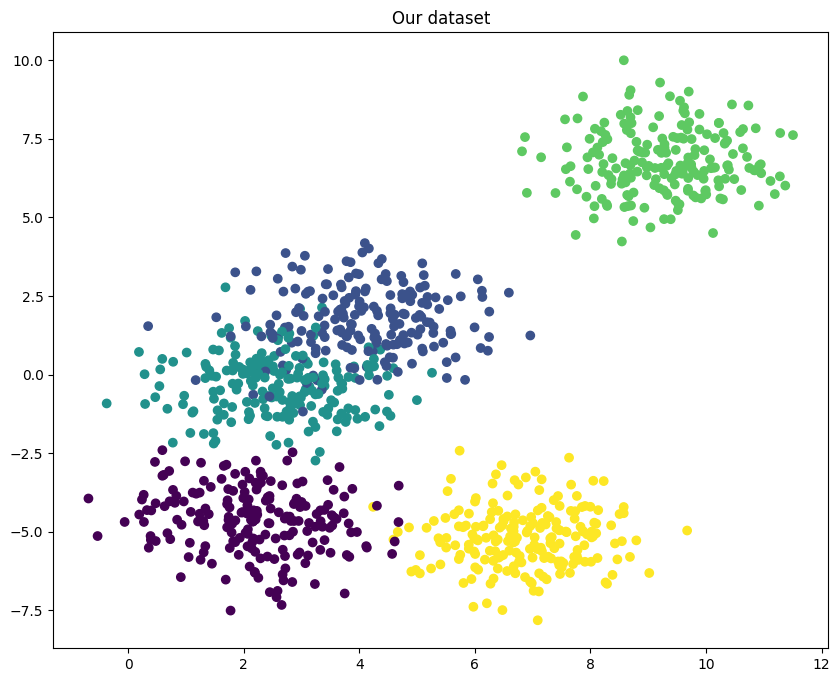

In [2]:
# Generate toy dataset with scikit-learn
X, y = make_blobs(n_samples=1000, centers=5, n_features=2) # in NN X is often used for input data and y for output
print(X.shape, y.shape)
# Plot dataset with matplotlib
plt.figure(figsize=(10, 8)) # initialize matplotlib figure
plt.title('Our dataset') # add title to our graph
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

**Note 1:** Here we have (of one point):
* **Input:** coordinates of a point in form (x, y)
* **Output/label/feature**: color of it.

So here we have basic regression classification problem - by given coordinates of a point predict its class (on graph it could be seen as different colors).
We have 5 different classes - `[0, 1, 2, 3, 4]`

**Note 2:** because we have multiple labels (not 2) it is multiclass classification problem.
If we had 2 classes (f.e. blue or red), then it would be binary classification problem.

### Prepare data

In [3]:
# Split into train/test datasets
# Note: Usually whole dataset is split into train, test and validation datasets with ratio 70/20/10.
# Here we won't have validation dataset so ratio train/test will be 80/20.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

### Build model

In [4]:
# With Sequential API
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

**Note:** this NN consists of only 2 layers - Input and output.
In input layer we have non-linear activation function - `ReLU`.
>By using linear activation functions, we have decision boundary only as straight line. Usually it leaves some data out (data isn't always linearly divided in the real world), models have less accuracy. Because of that in the most cases non-linear activation functions are used in NN. If you use non-linear activation functions, our model will be more elastic in categorizing data. In such way there will be fewer points that are falsely categorized (output != ground truth). Visit [this website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true&dataset_hide=true) to play with concept of non-linearity!

In output layer we have:
* 5 neurons as we have 5 classes
> In multiclass classification problem neuron number in output layer should be the same as label number.
> In binary classification we would've had only 1 neuron!
In classification problems on output we have probabilities of input data being one of classes.
* `softmax` activation function - [more information](classroom.google.com/u/0/c/NTI3NjI0OTQxMDc4).
> In binary classification we would have `sigmoid` activation function.

In [5]:
# compile model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

**Note:** [Categorical Cross entropy vs Sparse Categorical Cross entropy](https://stats.stackexchange.com/questions/326065/cross-entropy-vs-sparse-cross-entropy-when-to-use-one-over-the-other)

In [6]:
# train model
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 15ms/step - loss: 4.0471 - accuracy: 0.2325 - val_loss: 3.6445 - val_accuracy: 0.2650
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 3.4670 - accuracy: 0.2788 - val_loss: 3.1015 - val_accuracy: 0.2850
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 2.9913 - accuracy: 0.3338 - val_loss: 2.6844 - val_accuracy: 0.4250
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 2.6197 - accuracy: 0.4737 - val_loss: 2.3478 - val_accuracy: 0.5700
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 2.3139 - accuracy: 0.5150 - val_loss: 2.0752 - val_accuracy: 0.5900
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 2.0563 - accuracy: 0.5537 - val_loss: 1.8375 - val_accuracy: 0.6300
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 1.8286 - accuracy: 0.5900 - val_loss: 1.6283 - val_accuracy: 0.6600
Epoch 8/20
25/25 [=

In [7]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


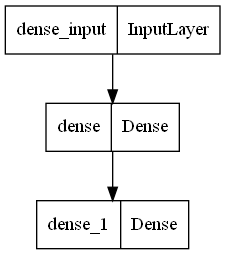

In [8]:
# plot model
tf.keras.utils.plot_model(model)

**Note:** here would go evaluation part.

### Plot results

In [13]:
pred_prob = model.predict([[2.0, -5.0]])
pred_prob

1/1 [==============================] - 0s 44ms/step


array([[9.2120802e-01, 2.4555121e-03, 4.4698096e-03, 9.5306876e-07,
        7.1865663e-02]], dtype=float32)

In [17]:
import numpy as np
res = np.argmax(pred_prob, axis=1)
res

array([0], dtype=int64)

In [37]:
# Plot decision boundary
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing multiclass classification...


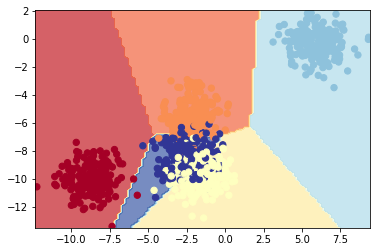

In [38]:
plot_decision_boundary(model, X, y)

In [44]:
## Save model
model.save('model') # save model in TensorFlow default format
model.save('model.h5') # save model in .h5 format

tf.keras.models.load_model('model.h5')

INFO:tensorflow:Assets written to: model\assets


[More information](https://www.tensorflow.org/guide/keras/save_and_serialize) about saving models.